<a href="https://colab.research.google.com/github/tkeldenich/Scikit_Learn_DecisionTree_and_Hyperparameters/blob/main/Scikit_Learn_DecisionTree_and_Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree How to Use It and Its Hyperparameters**

- [English Article](https://inside-machinelearning.com/en/decision-tree-and-hyperparameters/)
- [French Article](https://inside-machinelearning.com/decision-tree/)

Let’s see in details how Decision Tree works with [Scikit-Learn](https://scikit-learn.org/stable/) and especially how to use its hyperparameters to improve it!

Decision Tree, is a Machine Learning algorithm used to classify data based on a set of conditions.







<div>
<img src="https://inside-machinelearning.com/wp-content/uploads/2022/09/DecisionTree.jpg" width="450" text-align="center"/>
</div>

**In this article we will see how Decision Tree works.**

It is a powerful model that allowed us, [in our previous article to learn Machine Learning](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/), to reach an accuracy of 60%. Thus the Decision Tree is the model that gave us the highest success rate.

After having understood what a Decision Tree is, we’ll analyze the different hyperparameters that it provides.

Will we be able to improve our Decision Tree by tweaking the hyperparameters? Let’s see that in this article!

## **Load data**

Here, we’ll use the same data as [in our article on Machine Learning.](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/) If you haven’t read it yet and you have the basics of Machine Learning, you’ll still be able to understand this tutorial.

First of all, we import our datasets:

In [ ]:
!git clone https://github.com/tkeldenich/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


The dataset we are interested in is the [winequality-white.csv.](https://github.com/tkeldenich/First_Project_with_Scikit-Learn_MachineLearning/blob/main/winequality-white.csv)

We use the Pandas library to open and display it:

In [ ]:
import pandas as pd

df = pd.read_csv("/content/datasets/winequality-white.csv", sep=";")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


We have 7 features for 1 label.

The objective is to predict the quality of the wines according to the features.

We can directly create `X_train`, `X_test`, `y_train`, `y_test` for training the model.

In [ ]:
from sklearn.model_selection import train_test_split

features = df.drop(['quality'], axis=1)
labels = df[['quality']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

Now that the dataset is loaded, let’s move on to what really interests us: the Decision Tree.

## **Understand Decision Tree**

### **In theory**

Decision Tree is used in classification tasks.

In our case, we use it to classify wines among 7 quality levels: [3, 4, 5, 6, 7, 8, 9]

The Decision Tree algorithm analyzes our data. It relies on the features (`fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`, `density`, `pH`, `sulphates`, `alcohol`, `quality`) to predict to which class each wine belongs.

**It starts with the feature that its algorithm finds most relevant, and creates two subgroups.**

For example, if it analyzes that the wines of quality 3 have alcohol lower than 7%, it can create two subgroups: the group of wines lower than 7% (and of quality 3) and the groups of wines higher than 7% (and of quality 4, 5, 6, 7, 8, 9).

> Thus, the alcohol level below 7% is a decision rule to discriminate and classify our data.

The Decision Tree continues this process obtaining groups that correspond as well as possible to each of our classes and thereby classify the whole dataset.

**However, in practice, a rule does not necessarily allow a perfect discrimination of our data.**

Indeed, it is possible that in the wines with alcohol lower than 7%, there are not only wines of quality 3, but also others of quality 4, 5.

It’ll then be necessary to continue the creation of discrimination rules on this group of data.

This is how a Decision Tree can quickly end up with a large number of rules. Especially if our features are complex and poorly correlated with our labels, as shown by [our analysis of the correlation](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/) rate between our features and our labels.

### **In practice**

> The Decision Tree is composed of nodes, branches and leaves.

**In a node, the algorithm tests a feature of our dataset to discriminate the data. This is where it creates a discrimination rule.**

The test performed has 2 possible results: True or False.

For example, in our case, a test can be: is alcohol rate higher than 7%?

In both cases, the decision tree will create two paths: True and False.

**These two options create two branches that lead to another node where another test will be performed to discriminate our data.**

The first node is called the root.

The final node of a branch is called a leaf. It signifies the decision making.

The depth of a tree is defined by the length of the longest path between a root and a leaf.

The following tree has 3 nodes, 2 leaves, 1 root and a depth of 1 :

<div>
<img src="https://inside-machinelearning.com/wp-content/uploads/2022/09/wine3.jpg" width="600" text-align="center"/>
</div>

We have several information in this tree. Let’s see that in detail:

#### **First attribute**

The first attribute indicates the feature (and its value) on which the algorithm relied to discriminate our data.

*Note: the first attribute is not present in the leaf nodes.*

#### **Criterion (entropy or gini)**

Entropy *(or gini according to the user’s choice, see below)* is the measure that allows to quantify the uncertainty on the discrimination rule used.

The higher the entropy, the greater the uncertainty. Above 1, the uncertainty is considered high.

With an uncertainty higher than 1, we have little chance to predict the classes on the created subgroups. However, this does not mean that the discrimination rule is incorrect.

Indeed, Decision Tree calculates the discrimination that will allow to make the best prediction.

It rather indicates that the created subgroups will need, as well, an analysis to determine a discrimination rule and create other subgroups.

#### **Samples**

Samples represents the number of data belonging to the subgroup of the node.

#### **Value**

Value represents the number of data for each label in the node’s subgroup.

For example, for the bottom left node with `value = [10, 103, 1021, 1102, 216, 30, 1]`, we have 10 wines of quality 3, 103 wines of quality 4, 1021 of quality 5, etc.

#### **Class**

Class represents the decision taken if the current node would be a leaf.

The Decision Tree takes the decision that will give it the highest accuracy.

**For the root node, 1792 wines belong to class 6. All other classes have a lower number of wines. The optimal decision is therefore to predict class 6.**

*Besides, if there is an equal number of data for each class in a node, the Decision Tree is programmed to choose the first class of the list of equal numbers.*

We can notice that the two leaves give us the same class: 6 (which explains the entropy value). Indeed, our data being complex, we will need a Decision Tree with a higher depth to discriminate all our classes.

## **Decision Tree – the hyperparameters**

The Decision Tree has several hyperparameters. The most basic ones are :

- **criterion *(“gini” or “entropy”)*** – the function (“gini” or “entropy”) used to calculate the uncertainty on the discrimination rule selected.
- **splitter *(“best” or “random”)*** – the strategy used to choose the feature on which to create a discrimination rule. The default value is “best”. That is, for each node, the algorithm takes into account all features and chooses the one with the best criterion. If “random”, a random feature will be taken. The “random” technique is used to avoid overfitting.
- **max_features *(integer)*** – The number of features to take into account when searching for the best split (best discrimination rule).
- **random_state *(integer)*** – controls the randomness in the algorithm. If no number is specified, the algorithm will give it a random number for each new training. This will change the result for each new training. If a number is specified, the algorithm will always have the same result even after a new training.

### **Size attributes**

Next, we can list the parameters acting on the size of the Decision Tree

- **max_depth *(integer)*** – the maximum tree depth.
min_samples_split (integer) – The minimum number of samples required to create a decision rule.
- **min_samples_leaf *(integer)*** – The minimum number of samples required to be in a leaf. A leaf will not be allowed to have a number of samples lower than this value. Ideal to overcome overfitting.
- **max_leaf_nodes *(integer)*** – The maximum number of leaves contained in the Decision Tree.
- **min_impurity_decrease *(integer)*** – The minimum impurity decrease value required to create a new decision rule. A node will be split if the split results in an impurity decrease greater than or equal to this value. The impurity is directly correlated to the **criterion** (thus, the more the entropy decreases too, the more the impurity decreases).

We can initialize our tree with two hyperparameters:

- **criterion** = ” entropy”
- **max_depth** = 3

In [ ]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion="entropy",
                                           max_depth=3)

We train the tree:

In [ ]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

And compute its performance :

In [ ]:
decisionTree.score(X_test, y_test)

0.5040816326530613

50% accuracy, we’re far from the performance reached in [our article.](https://inside-machinelearning.com/en/scikit-learn-project-start-ml/)

Let’s display the Tree to analyze the result:

In [ ]:
labels_unique = labels.quality.unique().tolist()
labels_unique.sort()
labels_unique

[3, 4, 5, 6, 7, 8, 9]

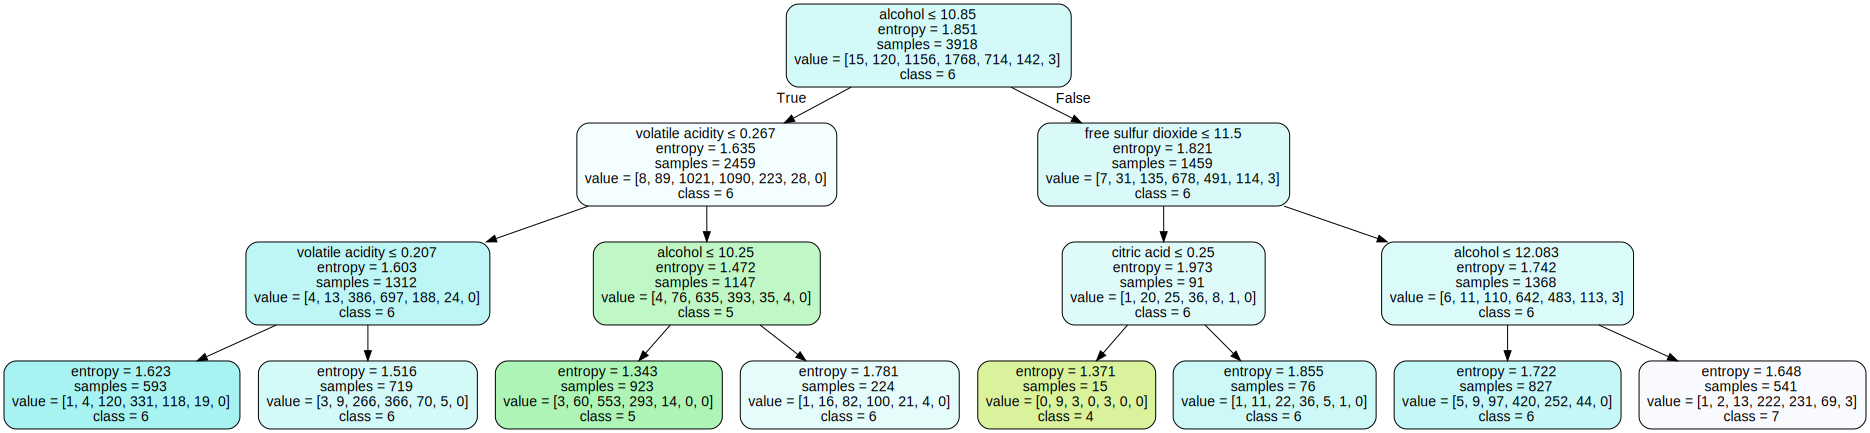

In [ ]:
import graphviz

dot_data = tree.export_graphviz(decisionTree, out_file=None,
                                feature_names=features.columns.to_list(),
                                class_names=[str(x) for x in labels_unique],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine")
graph

We see here that the Decision Tree does not have enough leaves to predict classes 3, 8 and 9.

Indeed the Decision Tree gives priority to the classes with the highest number of wines. Here, the tree has not yet had time to analyze the classes containing the least number of wines.


We’ll need a higher depth to get a good Decision Tree.

## **Pruned Decision Tree**

> Pruning is a technique used to reduce the complexity of a Decision Tree.

The idea is to measure the relevance of each node, and then to remove (to prune) the less critical ones, which add unnecessary complexity.

Pruning is performed by the Decision Tree when we indicate a value to this hyperparameter :

**ccp_alpha (float)** – The node (or nodes) with the highest complexity and less than **ccp_alpha** will be pruned.

Let’s see that in practice:

In [ ]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion="entropy",
                                           ccp_alpha=0.015,
                                           max_depth=3  
                                           )

We train the tree:

In [ ]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015, criterion='entropy', max_depth=3)

And compute its performance :

In [ ]:
decisionTree.score(X_test, y_test)

0.4969387755102041

**Here, we lose 0.8% of precision with Pruning but it is a technique worth knowing when we want to reduce the complexity of a Decision Tree.**

Let's display its associated graph:

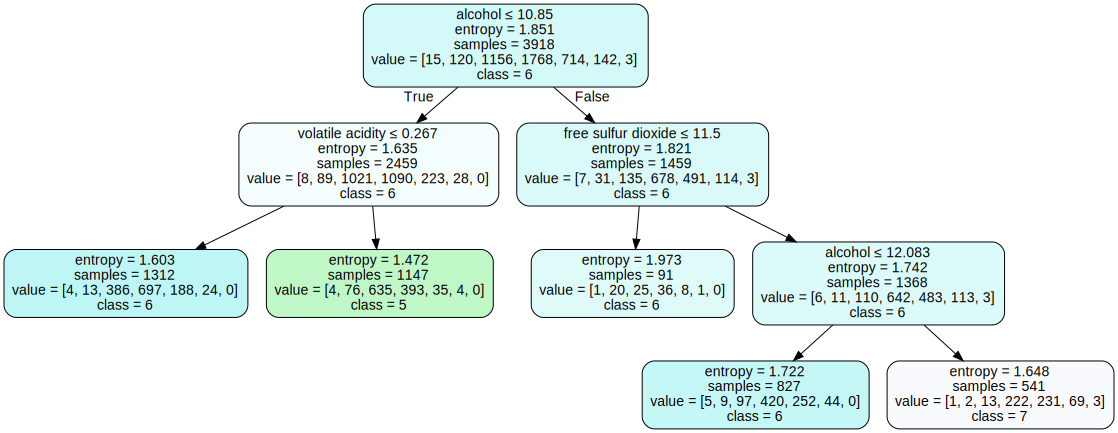

In [ ]:
import graphviz

dot_data = tree.export_graphviz(decisionTree, out_file=None,
                                feature_names=features.columns.to_list(),
                                #class_names=df.species_binary.name,
                                class_names=[str(x) for x in labels_unique],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("wine2")
graph

We can see here that Pruning removed 6 nodes that it had considered irrelevant.

## **Weighted Decision Tree**

Finally, let’s look at the hyperparameter that I find the most relevant:

- **class_weight *(dictionary)*** – during the criterion computation, the algorithm measures the impurity across all classes in the dataset. It gives an equal weight for each class. But by specifying in class_weight a different weight for each of the classes, the statistic will be different which will influence the final result of the algorithm.
- **min_weight_fraction_leaf *(float)*** – The minimum weighted fraction of the total sum of weights (of all input samples) required to be at a leaf node.

Let’s use **class_weight.** This can be a powerful option to improve the model as the number of wines differs greatly between classes.

**Therefore giving a different weight to the classes will allow the criterion to consider the amount of wine in each class.**

We index the value of the weights according to the number of wines in each class: `{3:1, 4:2, 5:4, 6:5, 7:3, 8:2, 9:1}`. Class 3 has a weight of 1, class 4 has a weight of 2, etc.

Thus, the higher the number of wines, the higher the weight:

In [ ]:
from sklearn import tree

decisionTree = tree.DecisionTreeClassifier(criterion="entropy",
                                           class_weight={3:1, 4:2, 5:4, 6:5, 7:3, 8:2, 9:1}
                                           )

We train the Tree:

In [ ]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={3: 1, 4: 2, 5: 4, 6: 5, 7: 3, 8: 2, 9: 1},
                       criterion='entropy')

And compute its performance:

In [ ]:
decisionTree.score(X_test, y_test)

0.6153061224489796

We reach 61.5% accuracy! That’s 1.5% more than before.

**This “small” improvement is actually a significant improvement! Indeed, in Machine Learning, the most complex task is the optimization of the model.**

Improving the performance, even by 1%, is already considerable!

And you, what score have you reached?

**This optimization method based on changing the hyperparameters is called: Hyperparameter Tuning.**

But there are many other techniques to improve a Machine Learning model:

- [Normalizing our data](https://inside-machinelearning.com/en/normalize-your-data/)
- [Cross-Validation](https://inside-machinelearning.com/en/cross-validation-tutorial/)
- Data Augmentation
- [Ensemble methods](https://inside-machinelearning.com/en/ensemble-methods/)

If you want to stay updated feel free to subscribe to our newsletter 😉